# Training ML Classifiers on MNIST Handwritten Digits Data

In this notebook, we'll load the MNIST Handwritten Digits dataset, briefly explore the data, and build different classifiers to predict new observations of handwritten digits.

We can load these models using `TensorFlow.js` in the browser for use in the MNIST paint app.

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflowjs as tfjs
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.manifold import TSNE

import seaborn as sns
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

sns.set(rc={'figure.figsize':(24,8)})

In [2]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
x_train[0].shape

(28, 28)

In [4]:
x_test[0].shape

(28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
y_test.shape

(10000,)

<AxesSubplot:ylabel='Count'>

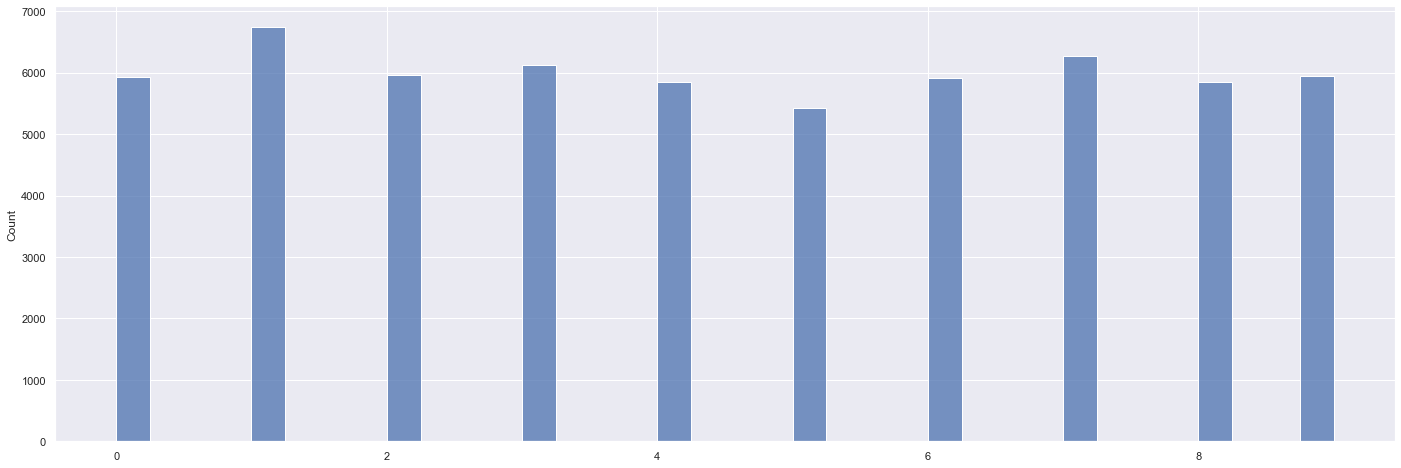

In [7]:
sns.histplot(y_train)

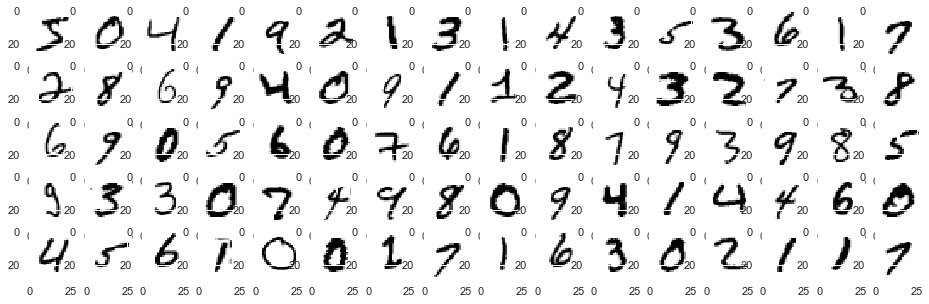

In [8]:
# preview the images first

def plot_mnist_images(data):
    plt.figure(figsize=(16, 10))
    x, y = 16, 10
    for i in range(80):  
        plt.subplot(y, x, i+1)
        plt.imshow(
            data[i].reshape((28,28)), 
            interpolation='nearest', 
            cmap=plt.get_cmap('binary')
        )
    plt.show()
    
plot_mnist_images(x_train)

In [9]:
# Normalize images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [10]:
# Sample from the training set
sample_size = 8000

np.random.seed(86)
idx = np.random.choice(60000, size=sample_size, replace=False)
train_sample = x_train.reshape(60000, -1)[idx, :]
label_sample = y_train[idx]

# Generate 2D embedding with TSNE
embeddings = TSNE(verbose=2).fit_transform(train_sample)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 8000 samples in 0.005s...
[t-SNE] Computed neighbors for 8000 samples in 2.491s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8000
[t-SNE] Computed conditional probabilities for sample 2000 / 8000
[t-SNE] Computed conditional probabilities for sample 3000 / 8000
[t-SNE] Computed conditional probabilities for sample 4000 / 8000
[t-SNE] Computed conditional probabilities for sample 5000 / 8000
[t-SNE] Computed conditional probabilities for sample 6000 / 8000
[t-SNE] Computed conditional probabilities for sample 7000 / 8000
[t-SNE] Computed conditional probabilities for sample 8000 / 8000
[t-SNE] Mean sigma: 2.090177
[t-SNE] Computed conditional probabilities in 0.299s
[t-SNE] Iteration 50: error = 94.4802170, gradient norm = 0.0005818 (50 iterations in 2.385s)
[t-SNE] Iteration 100: error = 87.5285950, gradient norm = 0.0019420 (50 iterations in 3.744s)
[t-SNE] Iteration 150: error = 86.6495361, gradient norm = 0

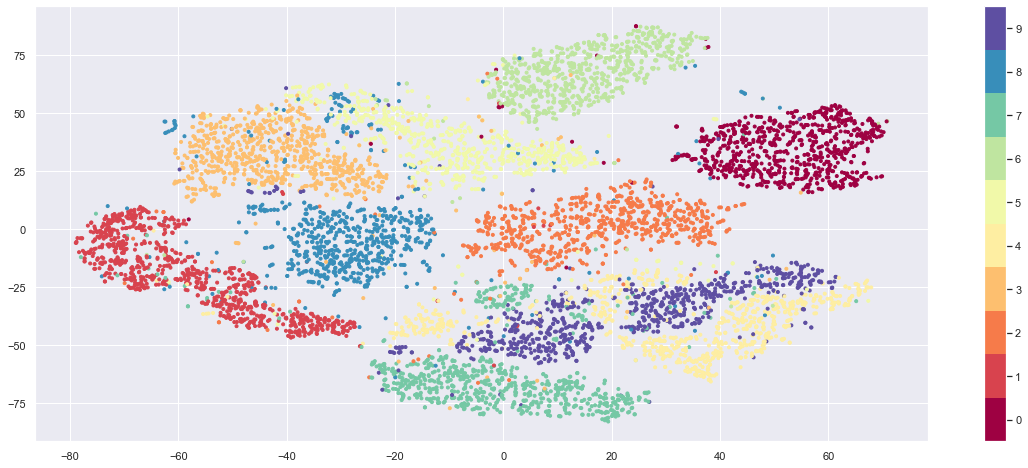

In [11]:
# Visualize TSNE embedding
vis_x = embeddings[:, 0]
vis_y = embeddings[:, 1]

plt.figure(figsize=(20, 8))
plt.scatter(vis_x, vis_y, c=label_sample, cmap=plt.cm.get_cmap("Spectral", 10), marker='.')
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5)
plt.show()

In [12]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [13]:
model = keras.Sequential(
    [
        keras.layers.InputLayer(input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

2021-09-04 11:04:34.400892: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [17]:
batch_size = 128
epochs = 4
model.compile(
    loss="categorical_crossentropy", 
    optimizer="adam", 
    metrics=["accuracy"]
)

In [18]:
model.fit(
    x_train, 
    y_train, 
    batch_size=batch_size, 
    epochs=epochs, 
    validation_split=0.1
)

Epoch 1/4
422/422 [==============================] - 20s 46ms/step - loss: 0.1093 - accuracy: 0.9660 - val_loss: 0.0528 - val_accuracy: 0.9855
Epoch 2/4
422/422 [==============================] - 20s 48ms/step - loss: 0.0821 - accuracy: 0.9745 - val_loss: 0.0462 - val_accuracy: 0.9863
Epoch 3/4
422/422 [==============================] - 19s 46ms/step - loss: 0.0681 - accuracy: 0.9786 - val_loss: 0.0427 - val_accuracy: 0.9865
Epoch 4/4
422/422 [==============================] - 20s 46ms/step - loss: 0.0600 - accuracy: 0.9808 - val_loss: 0.0371 - val_accuracy: 0.9892


In [19]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.03492528945207596
Test accuracy: 0.9884999990463257


In [20]:
# Save the trained model in h5 format
model.save('mnist_small_cnn.h5') 

In [21]:
# Alternatively, save the model directly to tfjs format
tfjs.converters.save_keras_model(model, './mnist_cnn.json')